In [1]:
import pandas as pd
import datetime as dt
from pandas_datareader import data as web
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import datetime as dt
import calendar as cld
import numpy as np 

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import *

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import normalized_mutual_info_score
from sklearn.metrics import r2_score
from itertools import *


In [16]:
start = dt.date(2021,1,2)
end = dt.date(2021,12,31)

now = dt.datetime.now()

apple = web.get_data_yahoo("AAPL",start,end)
tesla = web.get_data_yahoo("TSLA",start,end)
nvidia = web.get_data_yahoo("NVDA",start,end)
microsoft = web.get_data_yahoo("MSFT",start,end)
amazon = web.get_data_yahoo("AMZN",start,end)
amd = web.get_data_yahoo("AMD",start,end)
meta = web.get_data_yahoo("FB",start,end)
adobe = web.get_data_yahoo("ADBE",start,end)
google = web.get_data_yahoo("GOOGL",start,end)
pfizer = web.get_data_yahoo("PFE",start,end)

stocklist = [apple,tesla,nvidia,microsoft,amazon,amd,meta,adobe,google,pfizer]
stocklistname = ["apple","tesla","nvidia","microsoft","amazon","amd","meta","adobe","google","pfizer"]

# specify the stock datetime and movement features

In [17]:
for stock in stocklist:
    stock['Price Movement'] = stock['Open'] - stock['Close']
    stock['Range'] = stock['High'] - stock['Low']
    stock.loc[stock['Price Movement'] < 0, 'Price Trend'] = 'Down' 
    stock.loc[stock['Price Movement'] >= 0, 'Price Trend'] = 'Up' 
    stock['Weekday'] = stock.index.day_name()
    #stock['Year'] = stock.index.year
    stock['Month'] = stock.index.month
    stock['Day'] = stock.index.day
    
features = ['Close','Range','Volume','Weekday','Month','Day','Price Trend','Price Movement']
apple = apple[features]
tesla = tesla[features]
nvidia = nvidia[features]
microsoft = microsoft[features]
amazon = amazon[features]
amd = amd[features]
meta = meta[features]
adobe = adobe[features]
google = google[features]
pfizer = pfizer[features]
stocklist = [apple,tesla,nvidia,microsoft,amazon,amd,meta,adobe,google,pfizer]

# mutual information calculation on 'Weekday','Month','Day' (Volume)

In [4]:
xylist = {}
for stock,name in zip(stocklist,stocklistname):
    mi_stock = stock[stock.index > '2020-12-31'].copy()
    mi_stock['Weekday'] = LabelEncoder().fit_transform(mi_stock['Weekday'])
    
    #tesla_test_labelencode['Price Trend'] = LabelEncoder().fit_transform(tesla_test_labelencode['Price Trend'])
    Y = mi_stock['Volume'].values
    
    mi_stock = mi_stock.drop(['Close','Volume','Range','Price Trend'],axis = 1)
    X = mi_stock.values
    
    xylist[name] = X,Y

milist = {}
for name,stock in xylist.items():
    milist[name] = mutual_info_regression(stock[0],stock[1])
    #print('{}: {}'.format(name,mutual_info_regression(stock[0],stock[1])))
    
data = pd.DataFrame(milist,index = ['Weekday','Month','Day']).T
data

,Weekday,Month,Day
apple,0.000000,0.168945,0.000000
tesla,0.000000,0.160975,0.000000
nvidia,0.015640,0.141395,0.000000
microsoft,0.006020,0.072243,0.000000
amazon,0.000000,0.024022,0.000000
amd,0.014505,0.100239,0.023917
meta,0.000000,0.155799,0.009978
adobe,0.025218,0.119908,0.000000
google,0.037534,0.101696,0.000777
pfizer,0.025274,0.205581,0.000000


# mutual information calculation on 'Weekday','Month','Day' (Close)

In [5]:
xylist = {}
for stock,name in zip(stocklist,stocklistname):
    mi_stock = stock[stock.index > '2020-12-31'].copy()
    mi_stock['Weekday'] = LabelEncoder().fit_transform(mi_stock['Weekday'])
    
    #tesla_test_labelencode['Price Trend'] = LabelEncoder().fit_transform(tesla_test_labelencode['Price Trend'])
    Y = mi_stock['Close'].values
    
    mi_stock = mi_stock.drop(['Close','Volume','Range','Price Trend'],axis = 1)
    X = mi_stock.values
    
    xylist[name] = X,Y
    
milist = {}
for name,stock in xylist.items():
    milist[name] = mutual_info_regression(stock[0],stock[1])
    #print('{}: {}'.format(name,mutual_info_regression(stock[0],stock[1])))
    
data = pd.DataFrame(milist,index = ['Weekday','Month','Day']).T
data

,Weekday,Month,Day
apple,0.000000,0.965926,0.079205
tesla,0.000000,0.639358,0.052835
nvidia,0.000000,1.117689,0.141599
microsoft,0.000000,1.261409,0.167451
amazon,0.046398,0.384706,0.043527
amd,0.000000,0.967075,0.071855
meta,0.000000,0.827786,0.030899
adobe,0.000000,0.862908,0.037816
google,0.000000,1.189124,0.151785
pfizer,0.000000,1.026814,0.217723


# mutual information calculation on 40,50,60 days (Close)

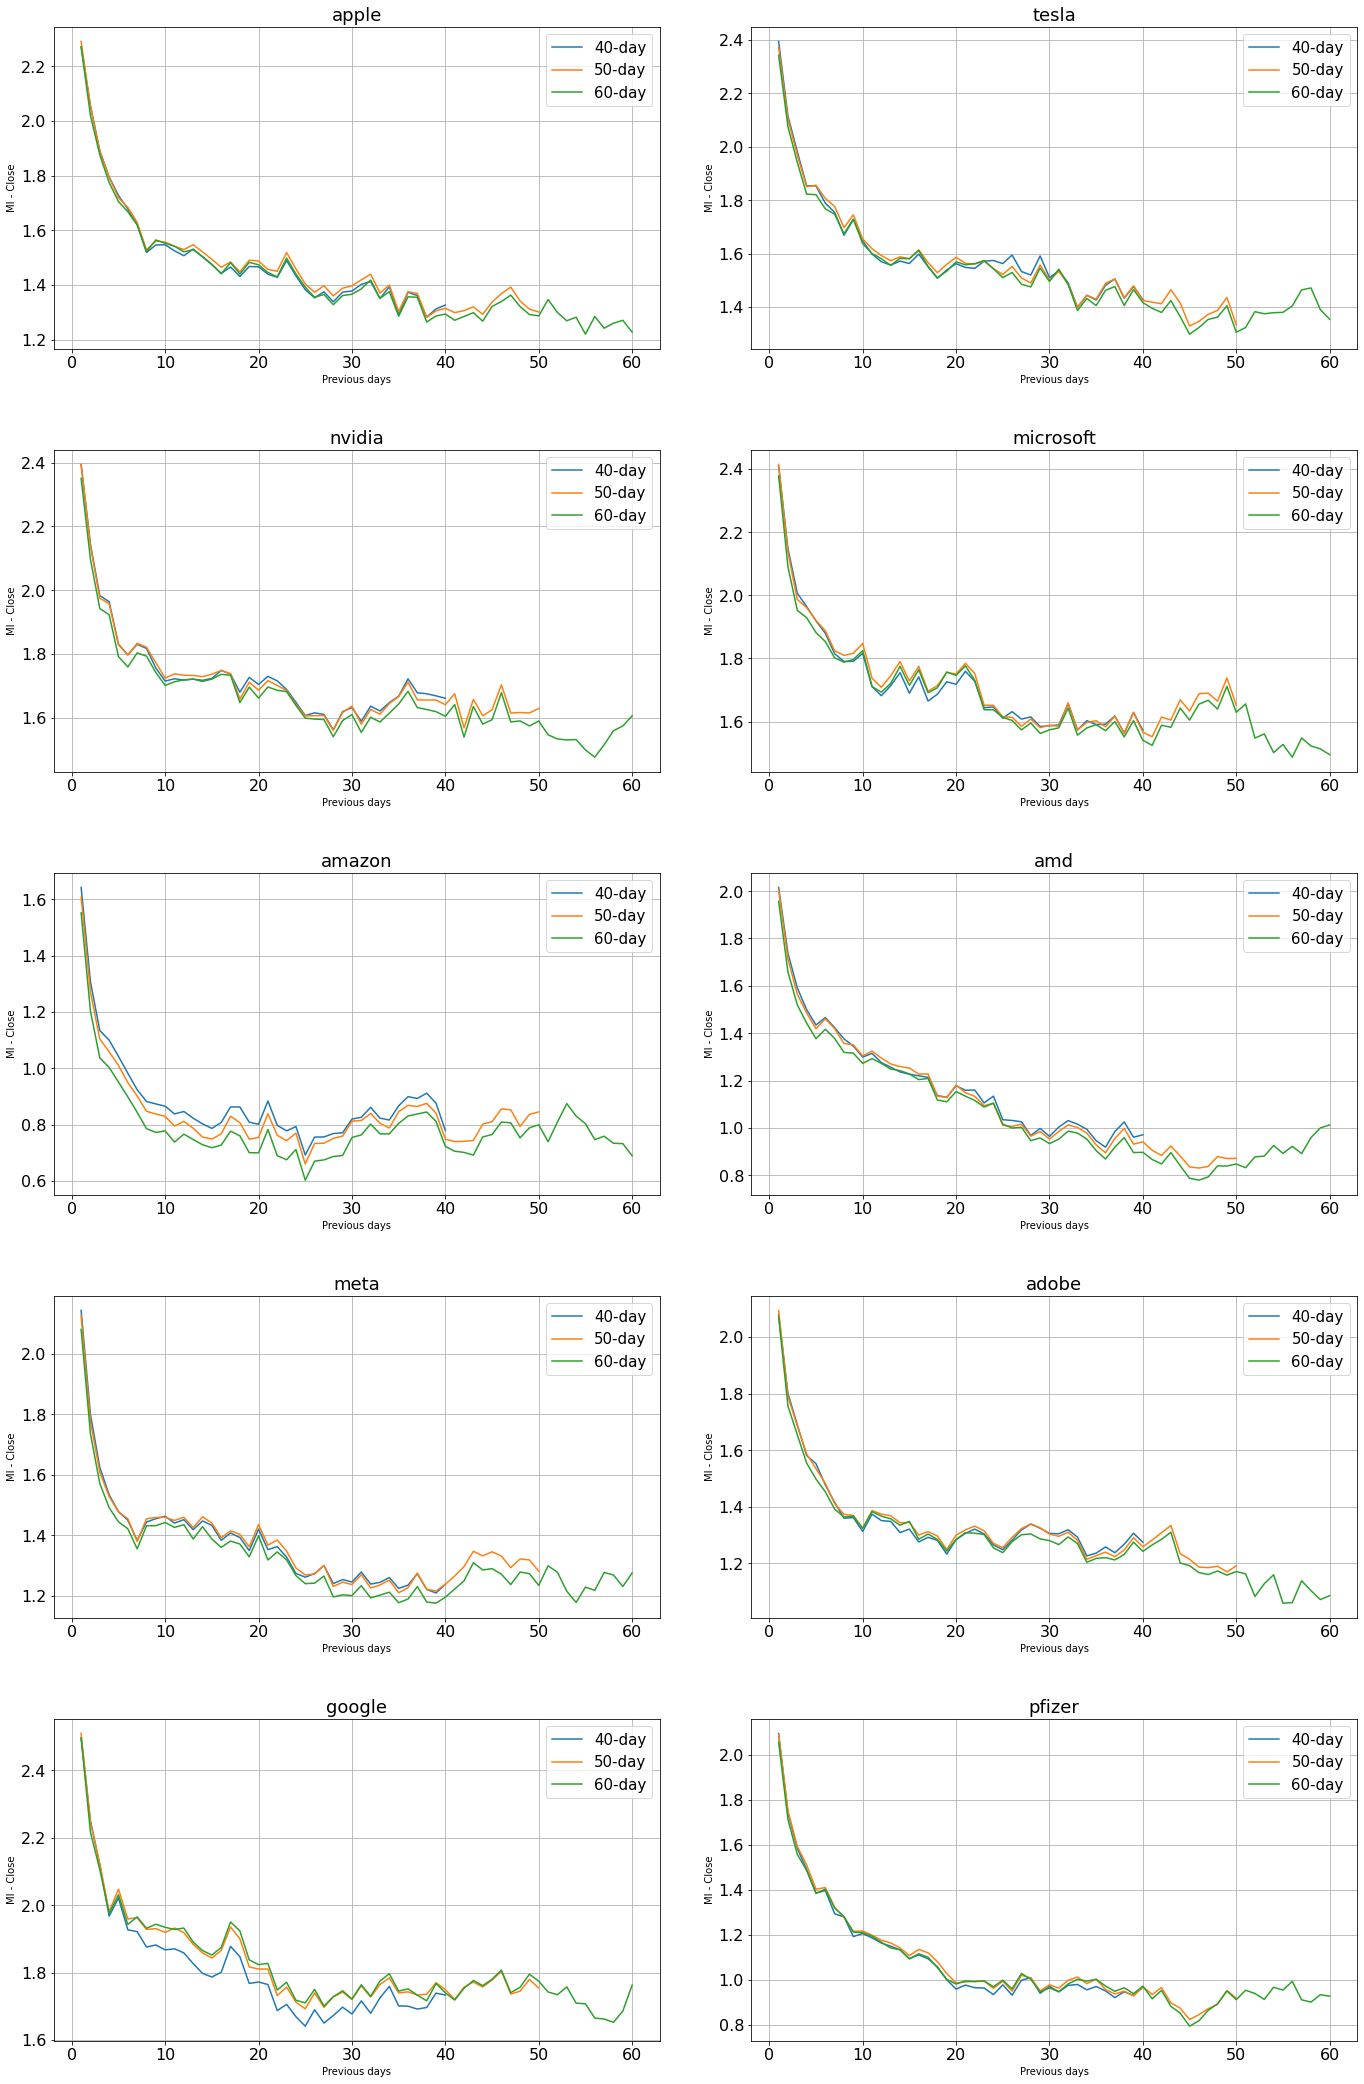

In [6]:
days = [40,50,60]
fig, axs = plt.subplots(5, 2,figsize=(20,30))

#plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 15})
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
for ax,mi_stock,name in zip(axs.ravel(),stocklist,stocklistname):
    mi_stock = mi_stock[mi_stock.index > '2020-01-01'].copy()
    #mi_stock['Price Trend'] = LabelEncoder().fit_transform(mi_stock['Price Trend'])
    mi_stock = pd.DataFrame([mi_stock['Close']]).T
    mi_stock = mi_stock.values
    for j in days:
        x = []
        y = []
        for i in range(j,len(mi_stock)):
            x.append(mi_stock[i-j:i,0])
            y.append(mi_stock[i,0])
        x, y = np.array(x), np.array(y) 
        ax.tick_params(axis='x', labelsize=16)
        ax.tick_params(axis='y', labelsize=16)
        ax.plot(range(j,0,-1),mutual_info_regression(x,y),label= str(j) + '-day')
        ax.set_title(name)
        #ax.get_legend().remove()
        ax.set_xlabel("")
        ax.figure.tight_layout(pad=3.0)
        ax.set_ylabel("MI - Close")
        ax.set_xlabel("Previous days")
        ax.grid()
    ax.legend()
     #plt.plot(range(j,0,-1),mutual_info_regression(x,y),label= str(j) + '-day',)        

# multiple subplots of close price in 2021

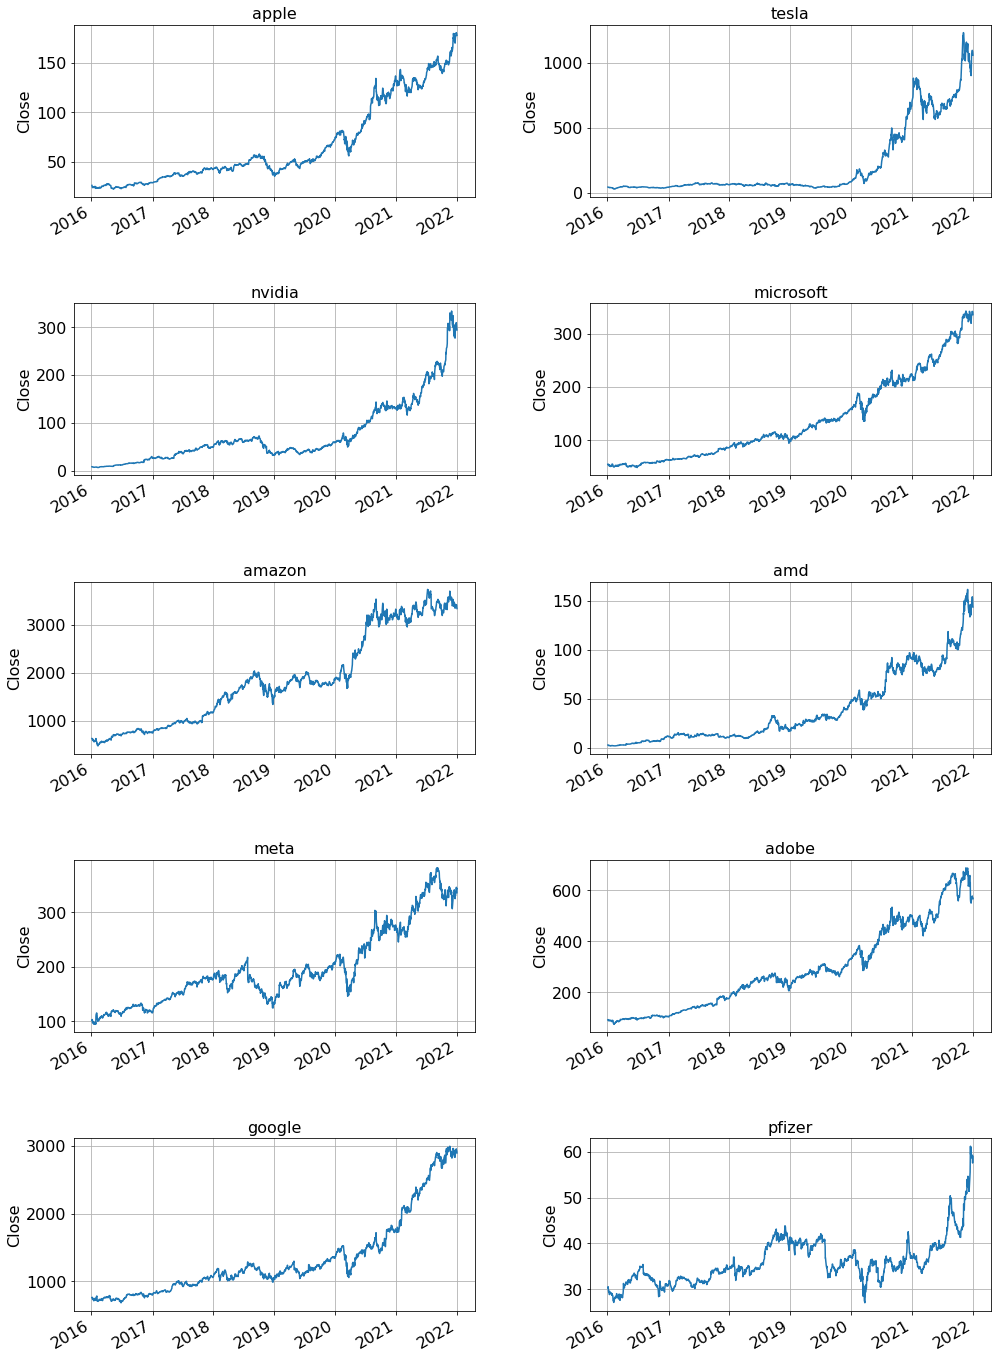

<Figure size 720x576 with 0 Axes>

In [19]:
fig, axs = plt.subplots(5, 2,figsize=(15,20))
plt.figure(figsize=(10,8))

for ax,hi,name in zip(axs.ravel(),stocklist,stocklistname):
    
    hi['Close'].plot(ax=ax)
    ax.set_title(name)
    #ax.get_legend().remove()
    ax.set_xlabel("")
    ax.figure.tight_layout(pad=3.0)
    ax.set_ylabel("Close")
    ax.grid()

# Functions on splitting time series train/test dataset and classifiers initialization and training

In [8]:
def train_test_data(trainsize,days_scale,ts_data):
    
    train = ts_data[0:trainsize]
    valid = ts_data[trainsize:]

    a = days_scale
    X_train, y_train = [], []
    for i in range(a,len(train)):
        X_train.append(ts_data[i-a:i,0])
        y_train.append(ts_data[i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)

    #print("x_train: ",X_train.shape)
    #print("valid: ",valid.shape)
    X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1]))

    inputs = data[len(data) - len(valid) - a:].values
    inputs = inputs.reshape(-1,1)

 
    X_test, y_test = [], []
    
    for i in range(a,len(valid)):
        X_test.append(inputs[i-a:i,0])
        y_test.append(inputs[i,0])
        
    X_test, y_test = np.array(X_test), np.array(y_test)

    #print("X_test: ",X_test.shape)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1]))
    return X_train, y_train, X_test, y_test

def all_clf_fit(x_train,y_train):
    rf_clf = RandomForestClassifier()
    lda_clf = LinearDiscriminantAnalysis()
    knei_clf = KNeighborsClassifier()
    GNB = GaussianNB()
    dt_clf = DecisionTreeClassifier()
    svm_clf = SVC(kernel='rbf')
    logisreg_clf = LogisticRegression()
    QDA_clf = QuadraticDiscriminantAnalysis()

    rf_clf.fit(X_train, y_train)
    lda_clf.fit(X_train, y_train)
    knei_clf.fit(X_train, y_train)
    GNB.fit(X_train, y_train)
    dt_clf.fit(X_train, y_train)
    svm_clf.fit(X_train, y_train)
    logisreg_clf.fit(X_train, y_train)
    QDA_clf.fit(X_train, y_train)
    clf =[rf_clf,lda_clf,knei_clf,GNB,dt_clf,svm_clf,logisreg_clf,QDA_clf]
    
    return clf


# plotting parameters setting

In [9]:
#["apple","tesla","nvidia","microsoft","amazon","amd","meta","adobe","google","pfizer"]

# Set the default text font size
plt.rc('font', size=16)
# Set the axes title font size
plt.rc('axes', titlesize=16)
# Set the axes labels font size
plt.rc('axes', labelsize=16)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=16)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=16)
# Set the legend font size
plt.rc('legend', fontsize=13)
# Set the font size of the figure title
plt.rc('figure', titlesize=2)


<font size="5"> -----------------------------------------------------------------------  </font>

# option1: classification models (main codes,only one stock) (runable)

In [10]:
#["apple","tesla","nvidia","microsoft","amazon","amd","meta","adobe","google","pfizer"]

trains_score = {'RandomForestClassifier()':[],'LinearDiscriminantAnalysis()':[],'KNeighborsClassifier()':[],'GaussianNB()':[],'DecisionTreeClassifier()':[],'SVC()':[],'LogisticRegression()':[],'QuadraticDiscriminantAnalysis()':[]}
tests_score = {'RandomForestClassifier()':[],'LinearDiscriminantAnalysis()':[],'KNeighborsClassifier()':[],'GaussianNB()':[],'DecisionTreeClassifier()':[],'SVC()':[],'LogisticRegression()':[],'QuadraticDiscriminantAnalysis()':[]}

for day in range(10,61):
    apple_clf = pfizer[pfizer.index >= '2020-01-01'].copy()
    apple_clf['Price Trend'] = LabelEncoder().fit_transform(apple_clf['Price Trend'])
    data = pd.DataFrame([apple_clf['Price Trend']]).T
    
    ts_data = data.values
    
    trainsize = len(apple_clf[apple_clf.index <= '2021-10-01'])
    
    X_train, y_train, X_test, y_test = train_test_data(trainsize,day,ts_data)
    
    clf = all_clf_fit(X_train,y_train)
    
    for i in clf:
        test_pred = i.predict(X_test)
        train_pred = i.predict(X_train)
        #print('day-{}:{}'.format(day,(confusion_matrix(y_test, test_pred, labels=[1, 0]))))
        trains_score[str(i)].append(accuracy_score(y_train,train_pred)*100)
        tests_score[str(i)].append(accuracy_score(y_test,test_pred)*100)
        
    

# option1(plotting): classification models (output codes) (runable) (by substituting each stock data)

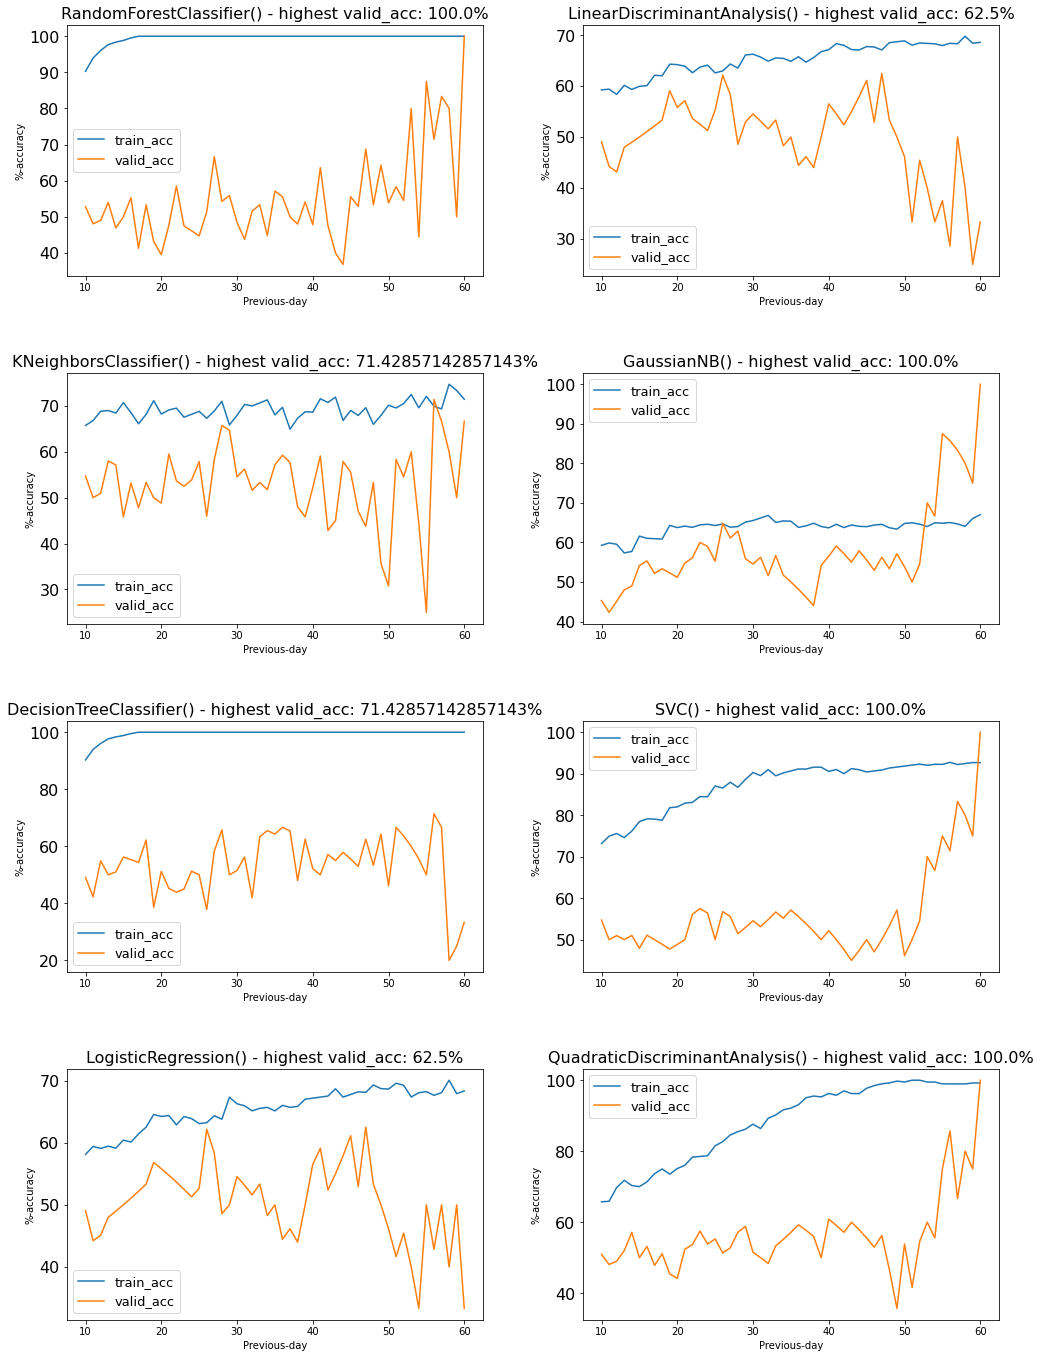

<Figure size 720x576 with 0 Axes>

In [23]:
fig, axs = plt.subplots(4, 2,figsize=(15,20))
plt.figure(figsize=(10,8))

for a,ax in zip(clf,axs.ravel()):
    
    #print("clf:{}, highest accuracy:{}.".format(str(a),max(tests_score[str(a)])))
    train_acc = np.array(trains_score[str(a)])
    valid_acc = np.array(tests_score[str(a)])
    pday = np.arange(10,len(tests_score[str(a)])+10)
    ax.plot(pday,train_acc)
    ax.plot(pday,valid_acc)
    ax.figure.tight_layout(pad=3.0)
    ax.set_title("{} - highest valid_acc: {}%".format(str(a),max(tests_score[str(a)])))
    ax.set_xlabel("Previous-day")
    ax.set_ylabel("%-accuracy")
    ax.legend(['train_acc','valid_acc'])
    
    #print('--------------------')
    
plt.show()

# option2: initialize the dict for classification models (done) 

In [12]:
#models = {'RandomForestClassifier()':[],'LinearDiscriminantAnalysis()':[],'KNeighborsClassifier()':[],'GaussianNB()':[],'DecisionTreeClassifier()':[],'SVC()':[],'LogisticRegression()':[],'QuadraticDiscriminantAnalysis()':[]}

#trains_score = models
#tests_score = models

#acc_score = {'train_acc':trains_score,'test_acc':tests_score}
#stock_acc_clf = {}

#for a in stocklistname:
#    stock_acc_clf[a] = acc_score

stock_acc_clf = {'apple': {'train_acc': {'RandomForestClassifier()': [],
   'LinearDiscriminantAnalysis()': [],
   'KNeighborsClassifier()': [],
   'GaussianNB()': [],
   'DecisionTreeClassifier()': [],
   'SVC()': [],
   'LogisticRegression()': [],
   'QuadraticDiscriminantAnalysis()': []},
  'test_acc': {'RandomForestClassifier()': [],
   'LinearDiscriminantAnalysis()': [],
   'KNeighborsClassifier()': [],
   'GaussianNB()': [],
   'DecisionTreeClassifier()': [],
   'SVC()': [],
   'LogisticRegression()': [],
   'QuadraticDiscriminantAnalysis()': []}},
 'tesla': {'train_acc': {'RandomForestClassifier()': [],
   'LinearDiscriminantAnalysis()': [],
   'KNeighborsClassifier()': [],
   'GaussianNB()': [],
   'DecisionTreeClassifier()': [],
   'SVC()': [],
   'LogisticRegression()': [],
   'QuadraticDiscriminantAnalysis()': []},
  'test_acc': {'RandomForestClassifier()': [],
   'LinearDiscriminantAnalysis()': [],
   'KNeighborsClassifier()': [],
   'GaussianNB()': [],
   'DecisionTreeClassifier()': [],
   'SVC()': [],
   'LogisticRegression()': [],
   'QuadraticDiscriminantAnalysis()': []}},
 'nvidia': {'train_acc': {'RandomForestClassifier()': [],
   'LinearDiscriminantAnalysis()': [],
   'KNeighborsClassifier()': [],
   'GaussianNB()': [],
   'DecisionTreeClassifier()': [],
   'SVC()': [],
   'LogisticRegression()': [],
   'QuadraticDiscriminantAnalysis()': []},
  'test_acc': {'RandomForestClassifier()': [],
   'LinearDiscriminantAnalysis()': [],
   'KNeighborsClassifier()': [],
   'GaussianNB()': [],
   'DecisionTreeClassifier()': [],
   'SVC()': [],
   'LogisticRegression()': [],
   'QuadraticDiscriminantAnalysis()': []}},
 'microsoft': {'train_acc': {'RandomForestClassifier()': [],
   'LinearDiscriminantAnalysis()': [],
   'KNeighborsClassifier()': [],
   'GaussianNB()': [],
   'DecisionTreeClassifier()': [],
   'SVC()': [],
   'LogisticRegression()': [],
   'QuadraticDiscriminantAnalysis()': []},
  'test_acc': {'RandomForestClassifier()': [],
   'LinearDiscriminantAnalysis()': [],
   'KNeighborsClassifier()': [],
   'GaussianNB()': [],
   'DecisionTreeClassifier()': [],
   'SVC()': [],
   'LogisticRegression()': [],
   'QuadraticDiscriminantAnalysis()': []}},
 'amazon': {'train_acc': {'RandomForestClassifier()': [],
   'LinearDiscriminantAnalysis()': [],
   'KNeighborsClassifier()': [],
   'GaussianNB()': [],
   'DecisionTreeClassifier()': [],
   'SVC()': [],
   'LogisticRegression()': [],
   'QuadraticDiscriminantAnalysis()': []},
  'test_acc': {'RandomForestClassifier()': [],
   'LinearDiscriminantAnalysis()': [],
   'KNeighborsClassifier()': [],
   'GaussianNB()': [],
   'DecisionTreeClassifier()': [],
   'SVC()': [],
   'LogisticRegression()': [],
   'QuadraticDiscriminantAnalysis()': []}},
 'amd': {'train_acc': {'RandomForestClassifier()': [],
   'LinearDiscriminantAnalysis()': [],
   'KNeighborsClassifier()': [],
   'GaussianNB()': [],
   'DecisionTreeClassifier()': [],
   'SVC()': [],
   'LogisticRegression()': [],
   'QuadraticDiscriminantAnalysis()': []},
  'test_acc': {'RandomForestClassifier()': [],
   'LinearDiscriminantAnalysis()': [],
   'KNeighborsClassifier()': [],
   'GaussianNB()': [],
   'DecisionTreeClassifier()': [],
   'SVC()': [],
   'LogisticRegression()': [],
   'QuadraticDiscriminantAnalysis()': []}},
 'meta': {'train_acc': {'RandomForestClassifier()': [],
   'LinearDiscriminantAnalysis()': [],
   'KNeighborsClassifier()': [],
   'GaussianNB()': [],
   'DecisionTreeClassifier()': [],
   'SVC()': [],
   'LogisticRegression()': [],
   'QuadraticDiscriminantAnalysis()': []},
  'test_acc': {'RandomForestClassifier()': [],
   'LinearDiscriminantAnalysis()': [],
   'KNeighborsClassifier()': [],
   'GaussianNB()': [],
   'DecisionTreeClassifier()': [],
   'SVC()': [],
   'LogisticRegression()': [],
   'QuadraticDiscriminantAnalysis()': []}},
 'adobe': {'train_acc': {'RandomForestClassifier()': [],
   'LinearDiscriminantAnalysis()': [],
   'KNeighborsClassifier()': [],
   'GaussianNB()': [],
   'DecisionTreeClassifier()': [],
   'SVC()': [],
   'LogisticRegression()': [],
   'QuadraticDiscriminantAnalysis()': []},
  'test_acc': {'RandomForestClassifier()': [],
   'LinearDiscriminantAnalysis()': [],
   'KNeighborsClassifier()': [],
   'GaussianNB()': [],
   'DecisionTreeClassifier()': [],
   'SVC()': [],
   'LogisticRegression()': [],
   'QuadraticDiscriminantAnalysis()': []}},
 'google': {'train_acc': {'RandomForestClassifier()': [],
   'LinearDiscriminantAnalysis()': [],
   'KNeighborsClassifier()': [],
   'GaussianNB()': [],
   'DecisionTreeClassifier()': [],
   'SVC()': [],
   'LogisticRegression()': [],
   'QuadraticDiscriminantAnalysis()': []},
  'test_acc': {'RandomForestClassifier()': [],
   'LinearDiscriminantAnalysis()': [],
   'KNeighborsClassifier()': [],
   'GaussianNB()': [],
   'DecisionTreeClassifier()': [],
   'SVC()': [],
   'LogisticRegression()': [],
   'QuadraticDiscriminantAnalysis()': []}},
 'pfizer': {'train_acc': {'RandomForestClassifier()': [],
   'LinearDiscriminantAnalysis()': [],
   'KNeighborsClassifier()': [],
   'GaussianNB()': [],
   'DecisionTreeClassifier()': [],
   'SVC()': [],
   'LogisticRegression()': [],
   'QuadraticDiscriminantAnalysis()': []},
  'test_acc': {'RandomForestClassifier()': [],
   'LinearDiscriminantAnalysis()': [],
   'KNeighborsClassifier()': [],
   'GaussianNB()': [],
   'DecisionTreeClassifier()': [],
   'SVC()': [],
   'LogisticRegression()': [],
   'QuadraticDiscriminantAnalysis()': []}}}

# option2: classification models (main codes) (done but need to initizalize the dict in previous code first)

In [13]:
for stock_clf_name,stock_clf_name_str in zip(stocklist,stocklistname):
    stock_clf = stock_clf_name[stock_clf_name.index >= '2021-01-01'].copy()
    stock_clf['Price Trend'] = LabelEncoder().fit_transform(stock_clf['Price Trend'])
    data = pd.DataFrame([stock_clf['Price Trend']]).T
    
    ts_data = data.values
    trainsize = len(stock_clf[stock_clf.index <= '2021-10-01'])
    
    for day in range(10,61):
        #print(stock_clf_name_str + ' ' + str(day))
        X_train, y_train, X_test, y_test = train_test_data(trainsize,day,ts_data)
        clf = all_clf_fit(X_train,y_train)

        for i in clf:
            test_pred = i.predict(X_test)
            train_pred = i.predict(X_train)
            #print('day-{}:{}'.format(day,(confusion_matrix(y_test, test_pred, labels=[1, 0]))))
            stock_acc_clf[stock_clf_name_str]['train_acc'][str(i)].append(accuracy_score(y_train,train_pred)*100)
            stock_acc_clf[stock_clf_name_str]['test_acc'][str(i)].append(accuracy_score(y_test,test_pred)*100)



C:\Users\WCW20000306\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\WCW20000306\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\WCW20000306\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\WCW20000306\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


# model analysis in dataframe (done)

In [16]:
rfc = []
lda = []
knn = []
gnb = []
dtc = []
svc = []
lr = []
qda = []
clf = ['RandomForestClassifier()', 'LinearDiscriminantAnalysis()', 'KNeighborsClassifier()','GaussianNB()','DecisionTreeClassifier()','SVC()','LogisticRegression()','QuadraticDiscriminantAnalysis()']

for stock_clf_name in stocklistname:
    rfc.append(stock_acc_clf[stock_clf_name]['test_acc']['RandomForestClassifier()'])
    lda.append(stock_acc_clf[stock_clf_name]['test_acc']['LinearDiscriminantAnalysis()'])
    knn.append(stock_acc_clf[stock_clf_name]['test_acc']['KNeighborsClassifier()'])
    gnb.append(stock_acc_clf[stock_clf_name]['test_acc']['GaussianNB()'])
    dtc.append(stock_acc_clf[stock_clf_name]['test_acc']['DecisionTreeClassifier()'])
    svc.append(stock_acc_clf[stock_clf_name]['test_acc']['SVC()'])
    lr.append(stock_acc_clf[stock_clf_name]['test_acc']['LogisticRegression()'])
    qda.append(stock_acc_clf[stock_clf_name]['test_acc']['QuadraticDiscriminantAnalysis()'])

   

rfc = np.array(rfc).reshape(-1)
lda = np.array(lda).reshape(-1)
knn = np.array(knn).reshape(-1)
gnb = np.array(gnb).reshape(-1)
dtc = np.array(dtc).reshape(-1)
svc = np.array(svc).reshape(-1)
lr = np.array(lr).reshape(-1)
qda = np.array(qda).reshape(-1)

df = pd.DataFrame(list(zip(rfc, lda,knn,gnb,dtc,svc,lr,qda)), columns = clf, dtype = float) 
df.describe()

,RandomForestClassifier(),LinearDiscriminantAnalysis(),KNeighborsClassifier(),GaussianNB(),DecisionTreeClassifier(),SVC(),LogisticRegression(),QuadraticDiscriminantAnalysis()
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,47.846104,46.606616,49.371195,46.276277,49.447143,46.631443,47.039567,49.391824
std,11.851406,13.890292,10.494048,13.734225,12.027591,13.163140,14.294220,10.829339
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.500000
25%,40.909091,38.461538,43.333333,38.095238,42.857143,37.500000,38.803855,41.951613
50%,48.275862,48.644689,50.000000,47.871377,50.000000,47.058824,48.888889,50.000000
75%,55.129310,54.545455,56.250000,53.961538,56.862745,55.555556,54.838710,56.250000
max,100.000000,100.000000,85.714286,100.000000,87.500000,100.000000,100.000000,100.000000


# option2(plotting) : classification models (done) 

In [ ]:
fig, axs = plt.subplots(4, 2,figsize=(15,20))
plt.figure(figsize=(10,8))


#["apple","tesla","nvidia","microsoft","amazon","amd","meta","adobe","google","pfizer"]
for ax,a in zip(axs.ravel(),clf):
        #print("clf:{}, highest accuracy:{}.".format(str(a),max(tests_score[str(a)])))
    valid_acc_list = stock_acc_clf['microsoft']['test_acc'][str(a)]
    train_acc = np.array(stock_acc_clf['microsoft']['train_acc'][str(a)])
    valid_acc = np.array(valid_acc_list)
    best_day = valid_acc_list.index(max(valid_acc_list))+10
    
    pday = np.arange(10,len(stock_acc_clf['microsoft']['test_acc'][str(a)])+10)
    ax.plot(pday,train_acc)
    ax.plot(pday,valid_acc)
    
    ax.figure.tight_layout(pad=3.0)
    ax.set_title("{}\n highest valid_acc: {:.4f}% on previous {}-day\n average validation accuracy:{:.4f}%".format(str(a),max(valid_acc),best_day,np.mean(valid_acc)))
    ax.set_xlabel("Previous-day")
    ax.set_ylabel("%-accuracy")
    ax.legend(['train_acc','valid_acc'])
    
plt.show()
    #print('--------------------')

In [9]:
apple['Price Movement']

KeyError: 'Price Movement'

# Correlation scatter plots

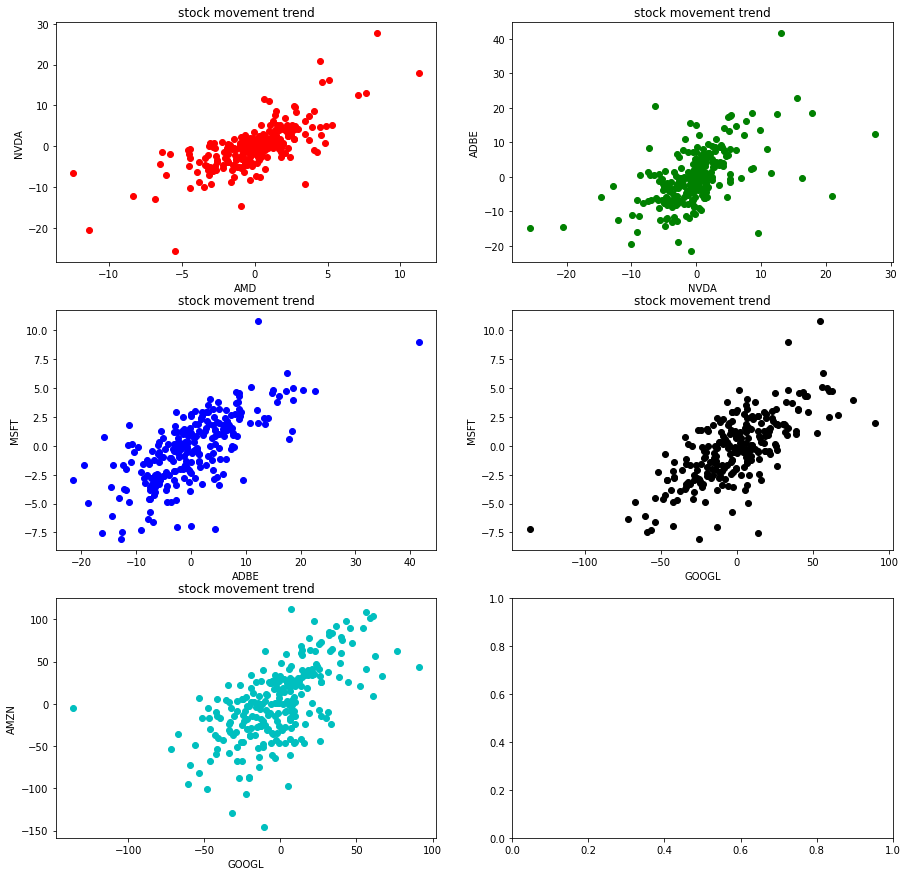

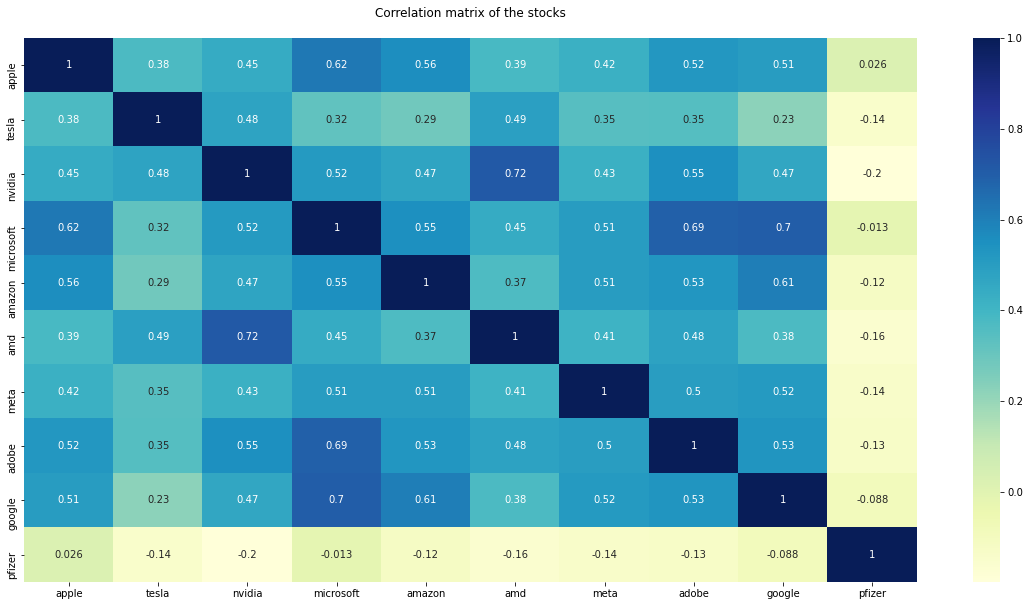

In [19]:
fig, axs = plt.subplots(3, 2,figsize=(15,15))
plt.figure(figsize=(20,10))

movement = pd.DataFrame([])
for i in stocklist:
    movement = movement.append([i['Price Movement']])
    
movement = movement.T
movement.columns = stocklistname

mat = movement.corr()
cor = sns.heatmap(mat,annot=True,cmap="YlGnBu")
cor.set(title = "Correlation matrix of the stocks\n")

axs[0, 0].scatter(movement['amd'], movement['nvidia'],c='r')
axs[0, 0].set_title('stock movement trend')
axs[0, 0].set_xlabel('AMD')
axs[0, 0].set_ylabel('NVDA')

axs[0, 1].scatter(movement['nvidia'], movement['adobe'], c='g')
axs[0, 1].set_title('stock movement trend')
axs[0, 1].set_xlabel('NVDA')
axs[0, 1].set_ylabel('ADBE')

axs[1, 0].scatter(movement['adobe'], movement['microsoft'], c='b')
axs[1, 0].set_title('stock movement trend')
axs[1, 0].set_xlabel('ADBE')
axs[1, 0].set_ylabel('MSFT')

axs[1, 1].scatter(movement['google'], movement['microsoft'], c='k')
axs[1, 1].set_title('stock movement trend')
axs[1, 1].set_xlabel('GOOGL')
axs[1, 1].set_ylabel('MSFT')

axs[2, 0].scatter(movement['google'], movement['amazon'], c='c')
axs[2, 0].set_title('stock movement trend')
axs[2, 0].set_xlabel('GOOGL')
axs[2, 0].set_ylabel('AMZN')

plt.show()

# LSTM (Min-Max normalization)

stock: apple
Epoch 1/5
600/600 - 21s - loss: 8.5780e-04 - mse: 8.5780e-04 - mae: 0.0195 - mape: 891.6306 - 21s/epoch - 36ms/step
Epoch 2/5
600/600 - 19s - loss: 5.0996e-04 - mse: 5.0996e-04 - mae: 0.0148 - mape: 7400.0527 - 19s/epoch - 32ms/step
Epoch 3/5
600/600 - 19s - loss: 3.1280e-04 - mse: 3.1280e-04 - mae: 0.0122 - mape: 3212.5334 - 19s/epoch - 32ms/step
Epoch 4/5
600/600 - 19s - loss: 2.4831e-04 - mse: 2.4831e-04 - mae: 0.0108 - mape: 5306.9468 - 19s/epoch - 32ms/step
Epoch 5/5
600/600 - 19s - loss: 2.5815e-04 - mse: 2.5815e-04 - mae: 0.0104 - mape: 29491.4062 - 19s/epoch - 31ms/step


<ipython-input-24-6ac1a6da8793>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


stock: tesla
Epoch 1/5
600/600 - 21s - loss: 7.3489e-04 - mse: 7.3489e-04 - mae: 0.0154 - mape: 47.8987 - 21s/epoch - 36ms/step
Epoch 2/5
600/600 - 20s - loss: 3.7541e-04 - mse: 3.7541e-04 - mae: 0.0107 - mape: 31.9168 - 20s/epoch - 33ms/step
Epoch 3/5
600/600 - 20s - loss: 1.6930e-04 - mse: 1.6930e-04 - mae: 0.0077 - mape: 22.9029 - 20s/epoch - 33ms/step
Epoch 4/5
600/600 - 20s - loss: 1.9000e-04 - mse: 1.9000e-04 - mae: 0.0085 - mape: 25.9197 - 20s/epoch - 33ms/step
Epoch 5/5
600/600 - 20s - loss: 1.7443e-04 - mse: 1.7443e-04 - mae: 0.0077 - mape: 23.9603 - 20s/epoch - 33ms/step


<ipython-input-24-6ac1a6da8793>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


stock: nvidia
Epoch 1/5
600/600 - 21s - loss: 3.9165e-04 - mse: 3.9165e-04 - mae: 0.0124 - mape: 14.7407 - 21s/epoch - 35ms/step
Epoch 2/5
600/600 - 19s - loss: 1.8329e-04 - mse: 1.8329e-04 - mae: 0.0098 - mape: 11.8159 - 19s/epoch - 32ms/step
Epoch 3/5
600/600 - 19s - loss: 1.4961e-04 - mse: 1.4961e-04 - mae: 0.0087 - mape: 10.5814 - 19s/epoch - 32ms/step
Epoch 4/5
600/600 - 19s - loss: 1.2505e-04 - mse: 1.2505e-04 - mae: 0.0078 - mape: 9.9355 - 19s/epoch - 32ms/step
Epoch 5/5
600/600 - 20s - loss: 1.0495e-04 - mse: 1.0495e-04 - mae: 0.0073 - mape: 8.2869 - 20s/epoch - 33ms/step


<ipython-input-24-6ac1a6da8793>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


stock: microsoft
Epoch 1/5
600/600 - 22s - loss: 7.6382e-04 - mse: 7.6382e-04 - mae: 0.0178 - mape: 8986.0312 - 22s/epoch - 37ms/step
Epoch 2/5
600/600 - 20s - loss: 3.5852e-04 - mse: 3.5852e-04 - mae: 0.0130 - mape: 6354.2646 - 20s/epoch - 34ms/step
Epoch 3/5
600/600 - 20s - loss: 2.6336e-04 - mse: 2.6336e-04 - mae: 0.0113 - mape: 6112.2441 - 20s/epoch - 33ms/step
Epoch 4/5
600/600 - 20s - loss: 2.1835e-04 - mse: 2.1835e-04 - mae: 0.0104 - mape: 9872.9395 - 20s/epoch - 33ms/step
Epoch 5/5
600/600 - 20s - loss: 2.1066e-04 - mse: 2.1066e-04 - mae: 0.0103 - mape: 6918.2241 - 20s/epoch - 33ms/step


<ipython-input-24-6ac1a6da8793>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


stock: amazon
Epoch 1/5
600/600 - 21s - loss: 0.0016 - mse: 0.0016 - mae: 0.0260 - mape: 9.4833 - 21s/epoch - 35ms/step
Epoch 2/5
600/600 - 19s - loss: 6.8019e-04 - mse: 6.8019e-04 - mae: 0.0186 - mape: 6.7959 - 19s/epoch - 32ms/step
Epoch 3/5
600/600 - 19s - loss: 5.7621e-04 - mse: 5.7621e-04 - mae: 0.0166 - mape: 6.1496 - 19s/epoch - 32ms/step
Epoch 4/5
600/600 - 19s - loss: 4.4427e-04 - mse: 4.4427e-04 - mae: 0.0149 - mape: 5.5594 - 19s/epoch - 32ms/step
Epoch 5/5
600/600 - 19s - loss: 4.2943e-04 - mse: 4.2943e-04 - mae: 0.0150 - mape: 5.8697 - 19s/epoch - 32ms/step


<ipython-input-24-6ac1a6da8793>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


stock: amd
Epoch 1/5
600/600 - 22s - loss: 6.6247e-04 - mse: 6.6247e-04 - mae: 0.0165 - mape: 17.9798 - 22s/epoch - 37ms/step
Epoch 2/5
600/600 - 20s - loss: 3.5037e-04 - mse: 3.5037e-04 - mae: 0.0127 - mape: 14.5095 - 20s/epoch - 34ms/step
Epoch 3/5
600/600 - 20s - loss: 2.2783e-04 - mse: 2.2783e-04 - mae: 0.0107 - mape: 12.3858 - 20s/epoch - 34ms/step
Epoch 4/5
600/600 - 20s - loss: 2.2909e-04 - mse: 2.2909e-04 - mae: 0.0101 - mape: 12.3541 - 20s/epoch - 34ms/step
Epoch 5/5
600/600 - 20s - loss: 2.1974e-04 - mse: 2.1974e-04 - mae: 0.0099 - mape: 11.0273 - 20s/epoch - 34ms/step


<ipython-input-24-6ac1a6da8793>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


stock: meta
Epoch 1/5
600/600 - 23s - loss: 0.0016 - mse: 0.0016 - mae: 0.0263 - mape: 10.5552 - 23s/epoch - 38ms/step
Epoch 2/5
600/600 - 21s - loss: 6.1176e-04 - mse: 6.1176e-04 - mae: 0.0177 - mape: 7.2811 - 21s/epoch - 34ms/step
Epoch 3/5
600/600 - 21s - loss: 4.8706e-04 - mse: 4.8706e-04 - mae: 0.0158 - mape: 6.5420 - 21s/epoch - 34ms/step
Epoch 4/5
600/600 - 21s - loss: 4.0319e-04 - mse: 4.0319e-04 - mae: 0.0145 - mape: 6.0900 - 21s/epoch - 35ms/step
Epoch 5/5
600/600 - 21s - loss: 3.9681e-04 - mse: 3.9681e-04 - mae: 0.0138 - mape: 5.7124 - 21s/epoch - 35ms/step


<ipython-input-24-6ac1a6da8793>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


stock: adobe
Epoch 1/5
600/600 - 22s - loss: 8.8974e-04 - mse: 8.8974e-04 - mae: 0.0192 - mape: 10.7414 - 22s/epoch - 37ms/step
Epoch 2/5
600/600 - 20s - loss: 4.9092e-04 - mse: 4.9092e-04 - mae: 0.0156 - mape: 8.1560 - 20s/epoch - 33ms/step
Epoch 3/5
600/600 - 20s - loss: 3.1990e-04 - mse: 3.1990e-04 - mae: 0.0124 - mape: 6.3368 - 20s/epoch - 33ms/step
Epoch 4/5
600/600 - 20s - loss: 3.2269e-04 - mse: 3.2269e-04 - mae: 0.0124 - mape: 6.8400 - 20s/epoch - 33ms/step
Epoch 5/5
600/600 - 20s - loss: 2.1456e-04 - mse: 2.1456e-04 - mae: 0.0102 - mape: 5.4176 - 20s/epoch - 33ms/step


<ipython-input-24-6ac1a6da8793>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


stock: google
Epoch 1/5
600/600 - 23s - loss: 9.4394e-04 - mse: 9.4394e-04 - mae: 0.0191 - mape: 20334.9922 - 23s/epoch - 38ms/step
Epoch 2/5
600/600 - 21s - loss: 3.4081e-04 - mse: 3.4081e-04 - mae: 0.0137 - mape: 18585.4199 - 21s/epoch - 35ms/step
Epoch 3/5
600/600 - 21s - loss: 2.3973e-04 - mse: 2.3973e-04 - mae: 0.0114 - mape: 971.2428 - 21s/epoch - 35ms/step
Epoch 4/5
600/600 - 21s - loss: 1.9257e-04 - mse: 1.9257e-04 - mae: 0.0104 - mape: 2711.8228 - 21s/epoch - 35ms/step
Epoch 5/5
600/600 - 21s - loss: 1.7991e-04 - mse: 1.7991e-04 - mae: 0.0099 - mape: 15492.8691 - 21s/epoch - 35ms/step


<ipython-input-24-6ac1a6da8793>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


stock: pfizer
Epoch 1/5
600/600 - 23s - loss: 0.0012 - mse: 0.0012 - mae: 0.0245 - mape: 63909.1641 - 23s/epoch - 38ms/step
Epoch 2/5
600/600 - 21s - loss: 5.8878e-04 - mse: 5.8878e-04 - mae: 0.0180 - mape: 73735.4219 - 21s/epoch - 35ms/step
Epoch 3/5
600/600 - 21s - loss: 4.0536e-04 - mse: 4.0536e-04 - mae: 0.0149 - mape: 39880.9883 - 21s/epoch - 35ms/step
Epoch 4/5
600/600 - 21s - loss: 3.4784e-04 - mse: 3.4784e-04 - mae: 0.0137 - mape: 40445.2773 - 21s/epoch - 35ms/step
Epoch 5/5
600/600 - 21s - loss: 3.1819e-04 - mse: 3.1819e-04 - mae: 0.0131 - mape: 32254.6816 - 21s/epoch - 35ms/step


<ipython-input-24-6ac1a6da8793>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


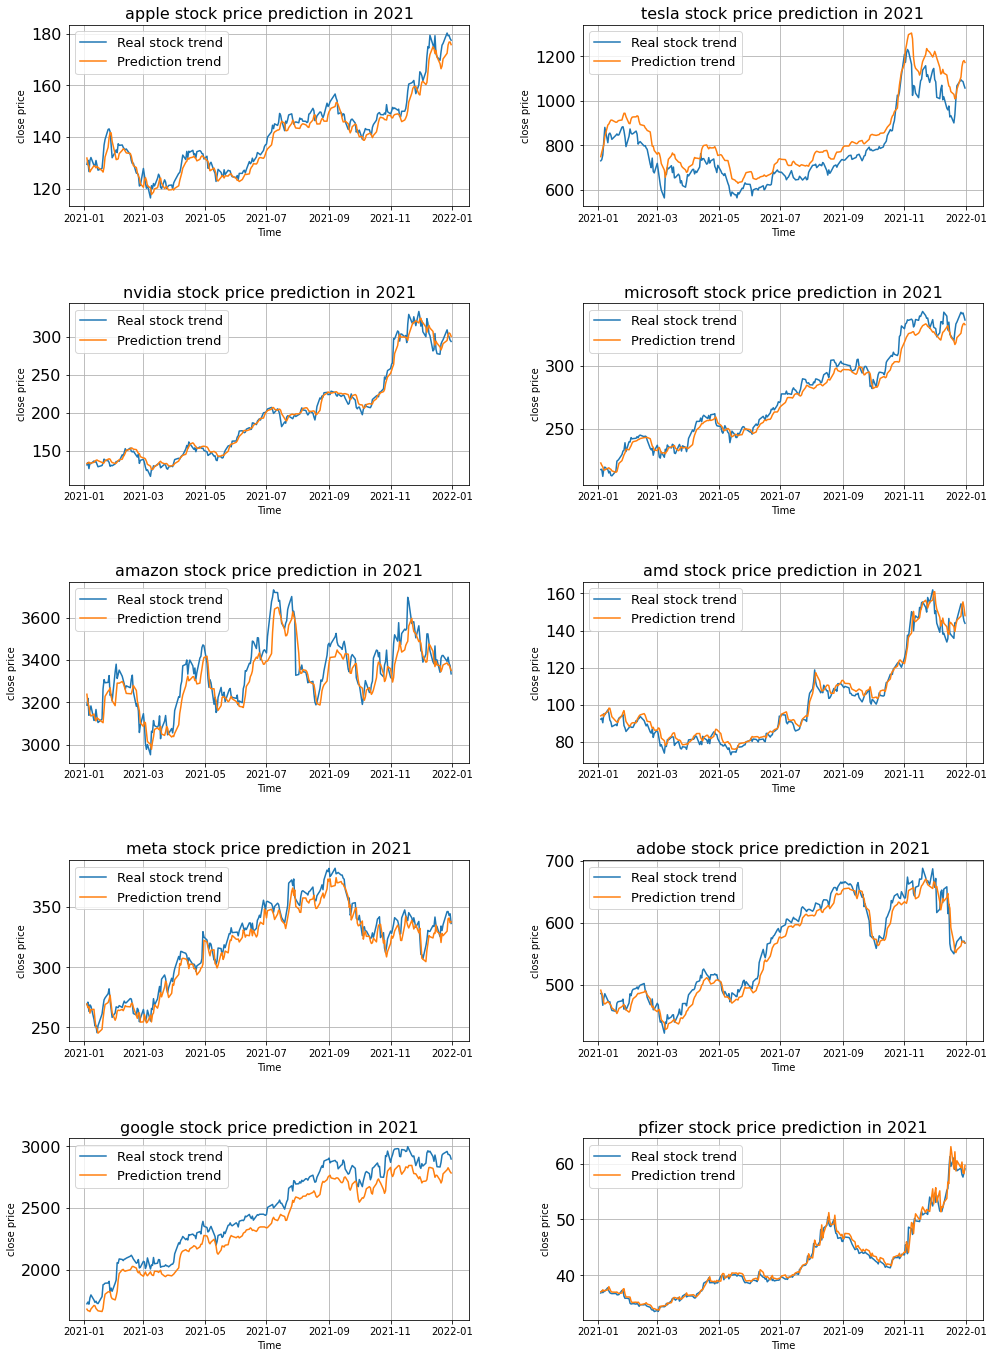

<Figure size 720x576 with 0 Axes>

In [24]:
fig, axs = plt.subplots(5, 2,figsize=(15,20))
plt.figure(figsize=(10,8))

stock_reg_minmax = {"apple":{'Close':None,'Predictions':None},"tesla":{'Close':None,'Predictions':None},"nvidia":{'Close':None,'Predictions':None},"microsoft":{'Close':None,'Predictions':None},"amazon":{'Close':None,'Predictions':None},"amd":{'Close':None,'Predictions':None},"meta":{'Close':None,'Predictions':None},"adobe":{'Close':None,'Predictions':None},"google":{'Close':None,'Predictions':None},"pfizer":{'Close':None,'Predictions':None}}


for ax,stock,stockname in zip(axs.ravel(),stocklist,stocklistname):
    data = pd.DataFrame([stock['Close']]).T.copy()
    data_dt = data.index
    data_arr = data.values

    trainsize = len(data[data.index <= '2020-12-31'])

    train = data_arr[0:trainsize]
    valid = data_arr[trainsize:]
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data_arr)

    x_train, y_train = [], []
    for i in range(60,len(train)):
        x_train.append(scaled_data[i-60:i,0])
        y_train.append(scaled_data[i,0])
    x_train, y_train = np.array(x_train), np.array(y_train)

    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

    print('stock:',stockname)
    model = Sequential()
    model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(LSTM(units=100))
    model.add(Dense(1))

    model.compile(loss='mse',optimizer='adam',metrics=['mse', 'mae', 'mape'])
    model.fit(x_train, y_train, epochs=5, batch_size=2, verbose=2)

    inputs = data[len(data) - len(valid) - 60:].values
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)

    X_test = []
    for i in range(60,inputs.shape[0]):
        X_test.append(inputs[i-60:i,0])
    X_test = np.array(X_test)

    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    closing_price = model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)

    train = data[:trainsize]

    valid = data[trainsize:]
    valid['Predictions'] = closing_price
    
    stock_reg_minmax[stockname]['Close'] = valid['Close'].copy()
    stock_reg_minmax[stockname]['Predictions'] = valid['Predictions'].copy()
    
    ax.figure.tight_layout(pad=3.0)
    ax.set_title('{} stock price prediction in 2021'.format(stockname))
    ax.set_xlabel('Time')
    ax.set_ylabel('close price')
    ax.plot(data_dt[trainsize:],valid['Close'])
    ax.plot(data_dt[trainsize:],valid['Predictions'])
    ax.legend(['Real stock trend','Prediction trend'])
    ax.grid()
plt.show()

# LSTM (Standardization)

stock: apple
Epoch 1/5
600/600 - 22s - loss: 0.0117 - mse: 0.0117 - mae: 0.0612 - mape: 34.5919 - 22s/epoch - 37ms/step
Epoch 2/5
600/600 - 20s - loss: 0.0042 - mse: 0.0042 - mae: 0.0440 - mape: 27.1002 - 20s/epoch - 33ms/step
Epoch 3/5
600/600 - 20s - loss: 0.0031 - mse: 0.0031 - mae: 0.0381 - mape: 28.0861 - 20s/epoch - 33ms/step
Epoch 4/5
600/600 - 20s - loss: 0.0036 - mse: 0.0036 - mae: 0.0392 - mape: 32.4876 - 20s/epoch - 33ms/step
Epoch 5/5
600/600 - 20s - loss: 0.0024 - mse: 0.0024 - mae: 0.0326 - mape: 26.4481 - 20s/epoch - 33ms/step


<ipython-input-25-04d70494ef7a>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


stock: tesla
Epoch 1/5
600/600 - 23s - loss: 0.0058 - mse: 0.0058 - mae: 0.0422 - mape: 13.3804 - 23s/epoch - 39ms/step
Epoch 2/5
600/600 - 21s - loss: 0.0027 - mse: 0.0027 - mae: 0.0305 - mape: 12.6074 - 21s/epoch - 36ms/step
Epoch 3/5
600/600 - 21s - loss: 0.0027 - mse: 0.0027 - mae: 0.0310 - mape: 11.5098 - 21s/epoch - 35ms/step
Epoch 4/5
600/600 - 21s - loss: 0.0019 - mse: 0.0019 - mae: 0.0251 - mape: 12.5119 - 21s/epoch - 35ms/step
Epoch 5/5
600/600 - 21s - loss: 0.0015 - mse: 0.0015 - mae: 0.0223 - mape: 17.4748 - 21s/epoch - 35ms/step


<ipython-input-25-04d70494ef7a>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


stock: nvidia
Epoch 1/5
600/600 - 23s - loss: 0.0046 - mse: 0.0046 - mae: 0.0490 - mape: 28.1018 - 23s/epoch - 39ms/step
Epoch 2/5
600/600 - 21s - loss: 0.0025 - mse: 0.0025 - mae: 0.0349 - mape: 17.2348 - 21s/epoch - 35ms/step
Epoch 3/5
600/600 - 21s - loss: 0.0016 - mse: 0.0016 - mae: 0.0279 - mape: 14.4413 - 21s/epoch - 35ms/step
Epoch 4/5
600/600 - 21s - loss: 0.0013 - mse: 0.0013 - mae: 0.0260 - mape: 12.5557 - 21s/epoch - 35ms/step
Epoch 5/5
600/600 - 21s - loss: 0.0013 - mse: 0.0013 - mae: 0.0254 - mape: 11.1649 - 21s/epoch - 36ms/step


<ipython-input-25-04d70494ef7a>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


stock: microsoft
Epoch 1/5
600/600 - 24s - loss: 0.0077 - mse: 0.0077 - mae: 0.0531 - mape: 53.4911 - 24s/epoch - 39ms/step
Epoch 2/5
600/600 - 21s - loss: 0.0029 - mse: 0.0029 - mae: 0.0368 - mape: 36.8859 - 21s/epoch - 36ms/step
Epoch 3/5
600/600 - 21s - loss: 0.0022 - mse: 0.0022 - mae: 0.0321 - mape: 43.0574 - 21s/epoch - 35ms/step
Epoch 4/5
600/600 - 21s - loss: 0.0021 - mse: 0.0021 - mae: 0.0334 - mape: 50.0851 - 21s/epoch - 35ms/step
Epoch 5/5
600/600 - 21s - loss: 0.0017 - mse: 0.0017 - mae: 0.0293 - mape: 34.5185 - 21s/epoch - 36ms/step


<ipython-input-25-04d70494ef7a>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


stock: amazon
Epoch 1/5
600/600 - 22s - loss: 0.0130 - mse: 0.0130 - mae: 0.0745 - mape: 168.2169 - 22s/epoch - 37ms/step
Epoch 2/5
600/600 - 20s - loss: 0.0050 - mse: 0.0050 - mae: 0.0510 - mape: 127.8085 - 20s/epoch - 34ms/step
Epoch 3/5
600/600 - 20s - loss: 0.0041 - mse: 0.0041 - mae: 0.0471 - mape: 103.1845 - 20s/epoch - 34ms/step
Epoch 4/5
600/600 - 20s - loss: 0.0033 - mse: 0.0033 - mae: 0.0404 - mape: 65.7726 - 20s/epoch - 34ms/step
Epoch 5/5
600/600 - 20s - loss: 0.0031 - mse: 0.0031 - mae: 0.0402 - mape: 42.1117 - 20s/epoch - 34ms/step


<ipython-input-25-04d70494ef7a>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


stock: amd
Epoch 1/5
600/600 - 23s - loss: 0.0086 - mse: 0.0086 - mae: 0.0566 - mape: 30.8504 - 23s/epoch - 38ms/step
Epoch 2/5
600/600 - 21s - loss: 0.0041 - mse: 0.0041 - mae: 0.0444 - mape: 28.2914 - 21s/epoch - 34ms/step
Epoch 3/5
600/600 - 21s - loss: 0.0034 - mse: 0.0034 - mae: 0.0406 - mape: 23.4482 - 21s/epoch - 34ms/step
Epoch 4/5
600/600 - 21s - loss: 0.0025 - mse: 0.0025 - mae: 0.0344 - mape: 19.6616 - 21s/epoch - 34ms/step
Epoch 5/5
600/600 - 21s - loss: 0.0038 - mse: 0.0038 - mae: 0.0395 - mape: 21.0703 - 21s/epoch - 34ms/step


<ipython-input-25-04d70494ef7a>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


stock: meta
Epoch 1/5
600/600 - 23s - loss: 0.0142 - mse: 0.0142 - mae: 0.0808 - mape: 70.1645 - 23s/epoch - 38ms/step
Epoch 2/5
600/600 - 21s - loss: 0.0070 - mse: 0.0070 - mae: 0.0594 - mape: 57.1569 - 21s/epoch - 35ms/step
Epoch 3/5
600/600 - 21s - loss: 0.0062 - mse: 0.0062 - mae: 0.0545 - mape: 36.3703 - 21s/epoch - 35ms/step
Epoch 4/5
600/600 - 21s - loss: 0.0044 - mse: 0.0044 - mae: 0.0453 - mape: 34.1742 - 21s/epoch - 35ms/step
Epoch 5/5
600/600 - 21s - loss: 0.0041 - mse: 0.0041 - mae: 0.0440 - mape: 28.9671 - 21s/epoch - 35ms/step


<ipython-input-25-04d70494ef7a>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


stock: adobe
Epoch 1/5
600/600 - 21s - loss: 0.0090 - mse: 0.0090 - mae: 0.0599 - mape: 53.5695 - 21s/epoch - 36ms/step
Epoch 2/5
600/600 - 20s - loss: 0.0044 - mse: 0.0044 - mae: 0.0468 - mape: 36.1620 - 20s/epoch - 33ms/step
Epoch 3/5
600/600 - 20s - loss: 0.0030 - mse: 0.0030 - mae: 0.0387 - mape: 33.3791 - 20s/epoch - 33ms/step
Epoch 4/5
600/600 - 19s - loss: 0.0026 - mse: 0.0026 - mae: 0.0364 - mape: 30.2623 - 19s/epoch - 32ms/step
Epoch 5/5
600/600 - 20s - loss: 0.0026 - mse: 0.0026 - mae: 0.0360 - mape: 32.0340 - 20s/epoch - 33ms/step


<ipython-input-25-04d70494ef7a>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


stock: google
Epoch 1/5
600/600 - 21s - loss: 0.0057 - mse: 0.0057 - mae: 0.0541 - mape: 23.6705 - 21s/epoch - 35ms/step
Epoch 2/5
600/600 - 19s - loss: 0.0027 - mse: 0.0027 - mae: 0.0380 - mape: 18.8553 - 19s/epoch - 32ms/step
Epoch 3/5
600/600 - 19s - loss: 0.0020 - mse: 0.0020 - mae: 0.0335 - mape: 15.7358 - 19s/epoch - 32ms/step
Epoch 4/5
600/600 - 19s - loss: 0.0016 - mse: 0.0016 - mae: 0.0296 - mape: 14.7533 - 19s/epoch - 32ms/step
Epoch 5/5
600/600 - 19s - loss: 0.0016 - mse: 0.0016 - mae: 0.0290 - mape: 14.3707 - 19s/epoch - 32ms/step


<ipython-input-25-04d70494ef7a>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


stock: pfizer
Epoch 1/5
600/600 - 23s - loss: 0.0310 - mse: 0.0310 - mae: 0.1250 - mape: 51.6441 - 23s/epoch - 38ms/step
Epoch 2/5
600/600 - 21s - loss: 0.0148 - mse: 0.0148 - mae: 0.0873 - mape: 37.0135 - 21s/epoch - 35ms/step
Epoch 3/5
600/600 - 22s - loss: 0.0116 - mse: 0.0116 - mae: 0.0771 - mape: 32.0098 - 22s/epoch - 36ms/step
Epoch 4/5
600/600 - 22s - loss: 0.0117 - mse: 0.0117 - mae: 0.0766 - mape: 34.5038 - 22s/epoch - 36ms/step
Epoch 5/5
600/600 - 21s - loss: 0.0113 - mse: 0.0113 - mae: 0.0760 - mape: 32.9320 - 21s/epoch - 35ms/step


<ipython-input-25-04d70494ef7a>:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


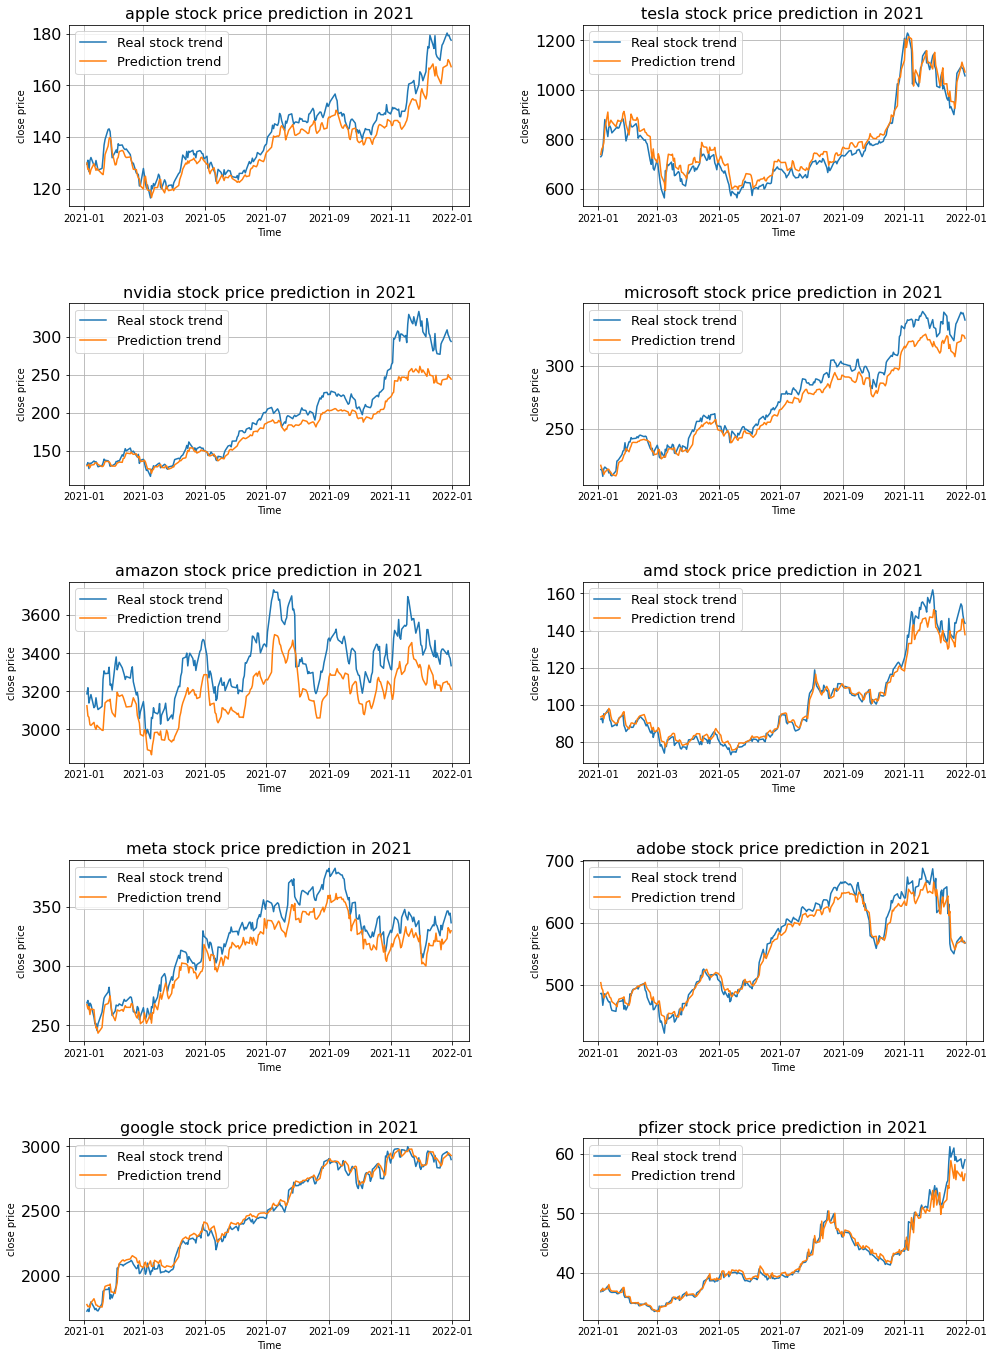

<Figure size 720x576 with 0 Axes>

In [25]:
fig, axs = plt.subplots(5, 2,figsize=(15,20))
plt.figure(figsize=(10,8))

stock_reg_standard = {"apple":{'Close':None,'Predictions':None},"tesla":{'Close':None,'Predictions':None},"nvidia":{'Close':None,'Predictions':None},"microsoft":{'Close':None,'Predictions':None},"amazon":{'Close':None,'Predictions':None},"amd":{'Close':None,'Predictions':None},"meta":{'Close':None,'Predictions':None},"adobe":{'Close':None,'Predictions':None},"google":{'Close':None,'Predictions':None},"pfizer":{'Close':None,'Predictions':None}}


for ax,stock,stockname in zip(axs.ravel(),stocklist,stocklistname):
    data = pd.DataFrame([stock['Close']]).T.copy()
    data_dt = data.index
    data_arr = data.values

    trainsize = len(data[data.index <= '2020-12-31'])


    train = data_arr[0:trainsize]
    valid = data_arr[trainsize:]
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data_arr)

    x_train, y_train = [], []
    for i in range(60,len(train)):
        x_train.append(scaled_data[i-60:i,0])
        y_train.append(scaled_data[i,0])
    x_train, y_train = np.array(x_train), np.array(y_train)

    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

    print('stock:',stockname)
    model = Sequential()
    model.add(LSTM(units=100, return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(LSTM(units=100))
    model.add(Dense(1))

    model.compile(loss='mse',optimizer='adam',metrics=['mse', 'mae', 'mape'])
    model.fit(x_train, y_train, epochs=5, batch_size=2, verbose=2)

    #predicting close price values in 2021, using past 60-day close-price from the train data
    inputs = data[len(data) - len(valid) - 60:].values
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)

    X_test = []
    for i in range(60,inputs.shape[0]):
        X_test.append(inputs[i-60:i,0])
    X_test = np.array(X_test)

    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    closing_price = model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)

    train = data[:trainsize]

    valid = data[trainsize:]
    valid['Predictions'] = closing_price
    
    stock_reg_standard[stockname]['Close'] = valid['Close']
    stock_reg_standard[stockname]['Predictions'] = valid['Predictions']
    
    ax.figure.tight_layout(pad=3.0)
    ax.set_title('{} stock price prediction in 2021'.format(stockname))
    ax.set_xlabel('Time',fontsize=10)
    ax.set_ylabel('close price')
    ax.plot(data_dt[trainsize:],valid['Close'])
    ax.plot(data_dt[trainsize:],valid['Predictions'])
    ax.legend(['Real stock trend','Prediction trend'])
    ax.grid()
plt.show()

In [22]:
#["apple","tesla","nvidia","microsoft","amazon","amd","meta","adobe","google","pfizer"]

# Set the default text font size
plt.rc('font', size=16)
# Set the axes title font size
# Set the axes labels font size
plt.rc('axes', labelsize=10)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=10)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=16)
# Set the legend font size
plt.rc('legend', fontsize=13)
# Set the font size of the figure title
plt.rc('figure', titlesize=2)


In [19]:
def rmse(y_pred,y):
    return np.sqrt(mean_squared_error(y_pred,y))

microsoft['Naive'] = microsoft['Close'].shift(1)
microsoft = microsoft.copy().dropna()
r2 = r2_score(microsoft['Close'],microsoft['Naive'])
r_mse = rmse(microsoft['Close'],microsoft['Naive'])
print('R2:',r2)
print('RMSE:',r_mse)

R2: 0.9988343947061419
RMSE: 2.678465703834275


# error estimators table (standard_score)

In [30]:

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mse = []
rmse = []
mae = []
mape = []
r2 = []
for stockname in stocklistname:
    mse.append(mean_squared_error(stock_reg_standard[stockname]['Close'],stock_reg_standard[stockname]['Predictions']))
    rmse.append(np.sqrt(mean_squared_error(stock_reg_standard[stockname]['Close'],stock_reg_standard[stockname]['Predictions'])))
    mae.append(mean_absolute_error(stock_reg_standard[stockname]['Close'],stock_reg_standard[stockname]['Predictions']))
    mape.append(mean_absolute_percentage_error(stock_reg_standard[stockname]['Close'],stock_reg_standard[stockname]['Predictions']))
    r2.append(r2_score(stock_reg_standard[stockname]['Close'],stock_reg_standard[stockname]['Predictions']))
df_standard = pd.DataFrame(zip(stocklistname,mse,rmse,mae,mape,r2),columns=['Stock','MSE','RMSE','MAE','MAPE','R_square'])
df_standard



,Stock,MSE,RMSE,MAE,MAPE,R_square
0,apple,25.676372,5.067186,4.177845,2.843754,0.880045
1,tesla,1435.679990,37.890368,31.898525,4.272950,0.944543
2,nvidia,689.075341,26.250245,17.857082,7.466634,0.799268
3,microsoft,96.492917,9.823081,8.113122,2.772501,0.929006
4,amazon,29868.222131,172.824252,163.178834,4.836443,-0.170762
5,amd,17.693398,4.206352,2.917686,2.715596,0.967588
6,meta,186.034809,13.639458,12.025297,3.633141,0.846250
7,adobe,185.848095,13.632611,10.744936,1.878197,0.967849
8,google,1861.774626,43.148286,34.349972,1.443400,0.986095
9,pfizer,1.075378,1.037004,0.647624,1.405196,0.974016


# error estimators table (minmax)

In [32]:
mse = []
rmse = []
mae = []
mape = []
r2 = []
for stockname in stocklistname:
    mse.append(mean_squared_error(stock_reg_minmax[stockname]['Close'],stock_reg_minmax[stockname]['Predictions']))
    rmse.append(np.sqrt(mean_squared_error(stock_reg_minmax[stockname]['Close'],stock_reg_minmax[stockname]['Predictions'])))
    mae.append(mean_absolute_error(stock_reg_minmax[stockname]['Close'],stock_reg_minmax[stockname]['Predictions']))
    mape.append(mean_absolute_percentage_error(stock_reg_minmax[stockname]['Close'],stock_reg_minmax[stockname]['Predictions']))
    r2.append(r2_score(stock_reg_minmax[stockname]['Close'],stock_reg_minmax[stockname]['Predictions']))
df_minmax = pd.DataFrame(zip(stocklistname,mse,rmse,mae,mape,r2),columns=['Stock','MSE','RMSE','MAE','MAPE','R_square'])
df_minmax

,Stock,MSE,RMSE,MAE,MAPE,R_square
0,apple,11.144678,3.338365,2.685989,1.876769,0.947934
1,tesla,5378.092145,73.335477,65.715163,8.612097,0.792256
2,nvidia,50.763754,7.124869,5.129211,2.595985,0.985212
3,microsoft,39.153159,6.257249,5.066859,1.780356,0.971193
4,amazon,4897.469498,69.981923,54.763189,1.621786,0.808031
5,amd,12.799280,3.577608,2.769854,2.744024,0.976553
6,meta,61.054279,7.813724,6.484155,2.011690,0.949541
7,adobe,220.753661,14.857781,12.195509,2.175975,0.961810
8,google,14666.937289,121.107131,113.383595,4.533885,0.890456
9,pfizer,0.812234,0.901240,0.616939,1.382040,0.980374
